## Data Loading
In this step, I load the loan dataset and inspect its structure to understand the features and target variable.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("loan_data.csv")

# EDA Process

In [3]:
df.shape

(500, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         500 non-null    int64 
 1   Gender             500 non-null    object
 2   Married            500 non-null    object
 3   Dependents         500 non-null    object
 4   Education          500 non-null    object
 5   Self_Employed      500 non-null    object
 6   ApplicantIncome    500 non-null    int64 
 7   CoapplicantIncome  500 non-null    int64 
 8   LoanAmount         500 non-null    int64 
 9   Loan_Amount_Term   500 non-null    int64 
 10  Credit_History     500 non-null    int64 
 11  Property_Area      500 non-null    object
 12  Loan_Default       500 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 50.9+ KB


## Data Preprocessing
In this step, I clean the dataset by handling missing values and encoding categorical variables so that the data can be used by the machine learning log_reg.

In [5]:
df.isnull().sum()

CustomerID           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Default         0
dtype: int64

In [6]:
df.describe()

,CustomerID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Default
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,12885.314000,7871.504000,395.022000,243.000000,0.810000,0.478000
std,144.481833,6507.045648,4201.448479,191.041827,86.108242,0.392694,0.500016
min,1001.000000,2011.000000,16.000000,50.000000,120.000000,0.000000,0.000000
25%,1125.750000,7246.250000,4551.250000,235.750000,180.000000,1.000000,0.000000
50%,1250.500000,12805.000000,7964.000000,400.500000,240.000000,1.000000,0.000000
75%,1375.250000,18340.250000,11446.000000,568.250000,300.000000,1.000000,1.000000
max,1500.000000,24986.000000,14916.000000,699.000000,360.000000,1.000000,1.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Default'],
      dtype='object')

# Data Cleaning

In [8]:
df= df.drop('CustomerID', axis =1)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Default
0,Male,Yes,1,Graduate,Yes,2526,661,540,120,0,Urban,1
1,Female,Yes,2,Not Graduate,No,5224,12075,522,120,1,Semiurban,1
2,Male,Yes,0,Not Graduate,No,17069,13753,59,360,1,Semiurban,0
3,Male,No,0,Graduate,No,13536,11811,454,120,1,Urban,0
4,Male,Yes,0,Graduate,No,15547,14788,351,120,1,Semiurban,0


# Encode Categorical Columns Into Numbers

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

cat_cols = ["Gender", "Married", "Dependents", "Education",
            "Self_Employed", "Property_Area"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Default
0,1,1,1,0,1,2526,661,540,120,0,2,1
1,0,1,2,1,0,5224,12075,522,120,1,1,1
2,1,1,0,1,0,17069,13753,59,360,1,1,0
3,1,0,0,0,0,13536,11811,454,120,1,2,0
4,1,1,0,0,0,15547,14788,351,120,1,1,0


# Define Features (features) and Target (y)

In [13]:
X = df.drop("Loan_Default", axis=1)
y = df["Loan_Default"]

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regresion log_reg

## log_reg Training
In this step, I train a Logistic Regression log_reg to predict whether a loan applicant is likely to default. Logistic Regression is chosen because it is simple, interpretable, and well-suited for binary classification problems.


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
y_pred = log_reg.predict(X_test)

# Evaluate the log_reg

## log_reg Evaluation
In this step, I evaluate the trained log_reg using standard classification metrics such as accuracy and confusion matrix to understand how well the log_reg performs on unseen data.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.96


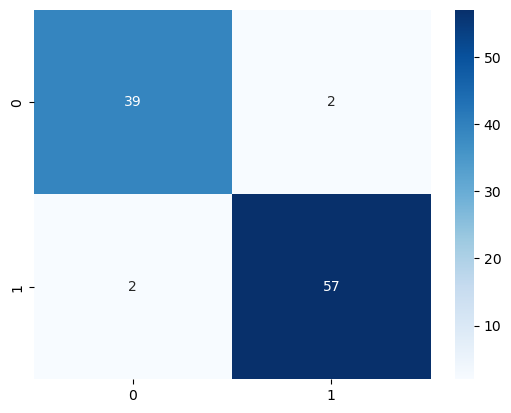

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        59

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# Features Importance

In [23]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

importance

#higher coefficient → increases probability of default

#negative coefficient → decreases risk

,Feature,Coefficient
4,Self_Employed,2.421623e-01
10,Property_Area,5.477353e-02
7,LoanAmount,1.721766e-02
5,ApplicantIncome,1.080441e-07
6,CoapplicantIncome,-3.535103e-05
8,Loan_Amount_Term,-4.156607e-03
2,Dependents,-1.792438e-02
0,Gender,-1.551694e-01
3,Education,-2.859832e-01
1,Married,-3.720892e-01
